In [57]:
#pip install kneed

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

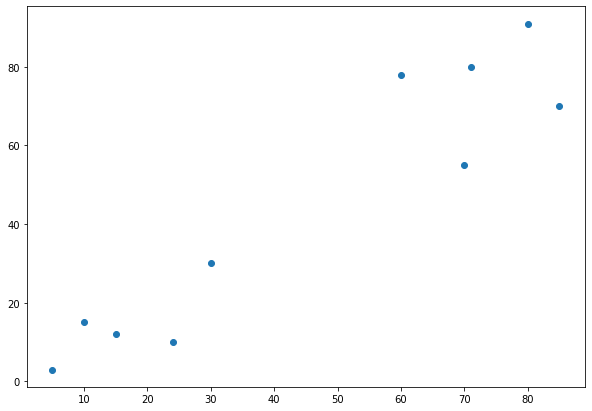

In [100]:
df = pd.read_csv('clus1.csv', index_col=0)

plt.figure(figsize =(10,7))
plt.scatter(df['nC'], df['nH'])

In [61]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

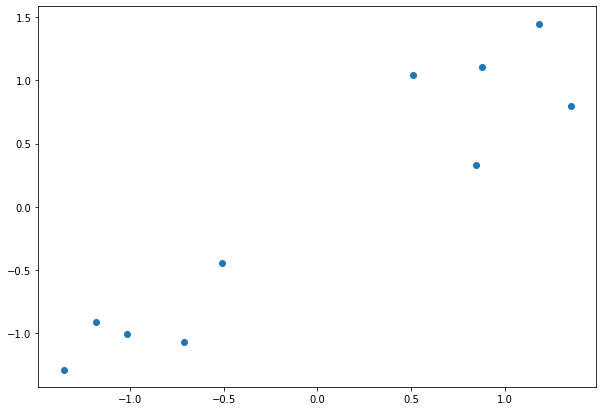

In [62]:
plt.figure(figsize = (10,7))
plt.scatter(df['nC'], df['nH'])

In [63]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [64]:
kmeans.inertia_

1.4197485718358271

In [65]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

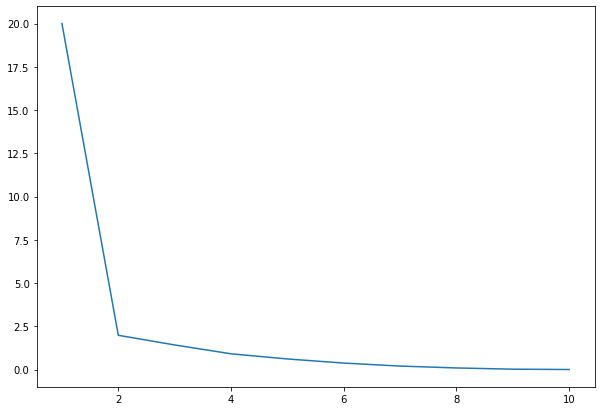

In [66]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), wcss)

In [67]:
kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
kl.elbow

2

In [68]:
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(df)
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

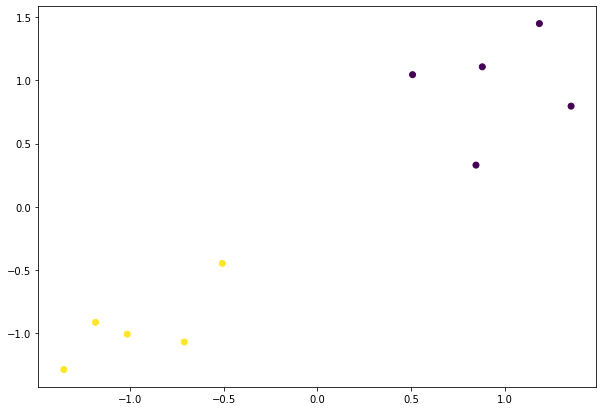

In [69]:
plt.figure(figsize =(10,7))
plt.scatter(df['nC'], df['nH'], c = pred)

In [70]:
df[pred == 0][df.columns[0]]

5    1.352865
6    0.879363
7    0.507325
8    0.845541
9    1.183757
Name: nC, dtype: float64

In [71]:
kmeans.cluster_centers_

array([[ 0.95377011,  0.94473741],
       [-0.95377011, -0.94473741]])

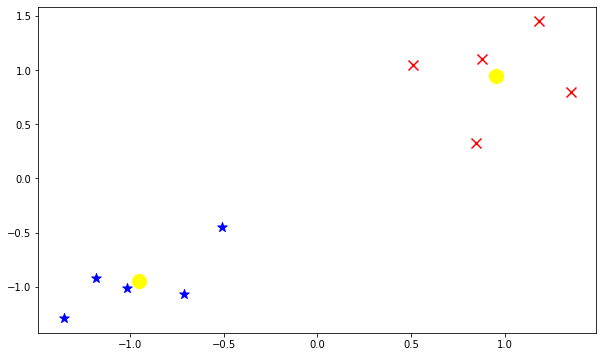

In [72]:
plt.figure(figsize = (10,6))
plt.scatter(df[pred==0][df.columns[0]], df[pred==0][df.columns[1]], s=100, c = 'red', marker = 'x')
plt.scatter(df[pred==1][df.columns[0]], df[pred==1][df.columns[1]], s=100, c = 'blue', marker = '*')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', marker = 'o')

In [73]:
def auto_kmeans(df):
  df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
  wcss = []

  for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
  
  plt.figure(figsize=(10,7))
  plt.plot(range(1,11),wcss)
  plt.show()

  kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
  elbow_point = kl.elbow

  kmeans = KMeans(n_clusters=elbow_point, random_state=42)
  kmeans.fit(df)
  pred = kmeans.predict(df)

  colors = ['red', 'blue']
  markers = ['x', '*']

  print(f'optimal number of clusters {elbow_point}')

  plt.figure(figsize=(10,7))
  for i in range(elbow_point):
      plt.scatter(df[pred==i][df.columns[0]], df[pred==i][df.columns[1]], s=100, c = colors[i], marker = markers[i])
      plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'green', marker = 'o')

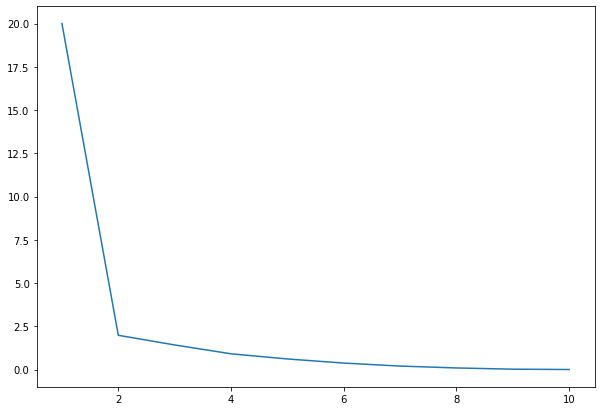

optimal number of clusters 2


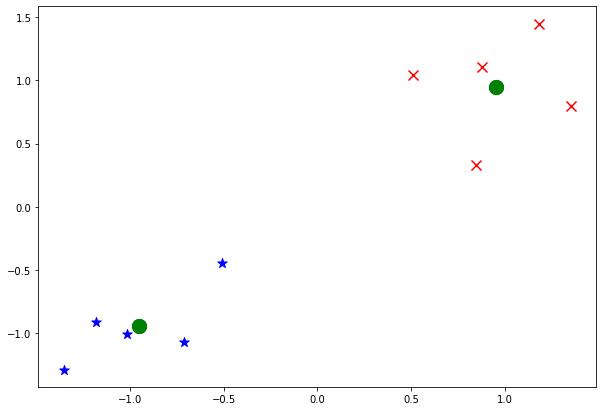

In [74]:
auto_kmeans(df)

In [75]:
def auto_kmeans_2(df, colors = ['red', 'blue', 'green'], markers = ['x', '*', '+']):
  df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
  wcss = []

  for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
  
  plt.figure(figsize=(10,7))
  plt.plot(range(1,11),wcss)
  plt.show()

  kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
  elbow_point = kl.elbow

  kmeans = KMeans(n_clusters=elbow_point, random_state=42)
  kmeans.fit(df)
  pred = kmeans.predict(df)

  colors = colors[:elbow_point]
  markers = markers[:elbow_point]

  print(f'optimal number of clusters {elbow_point}')

  plt.figure(figsize=(10,7))
  for i in range(elbow_point):
      plt.scatter(df[pred==i][df.columns[0]], df[pred==i][df.columns[1]], s=100, c = colors[i], marker = markers[i])
      plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'orange', marker = 'o')
  

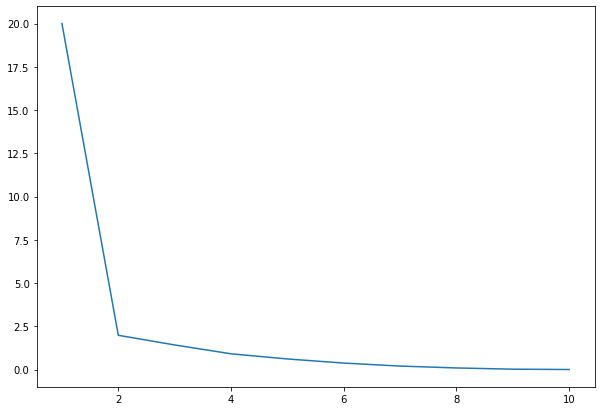

optimal number of clusters 2


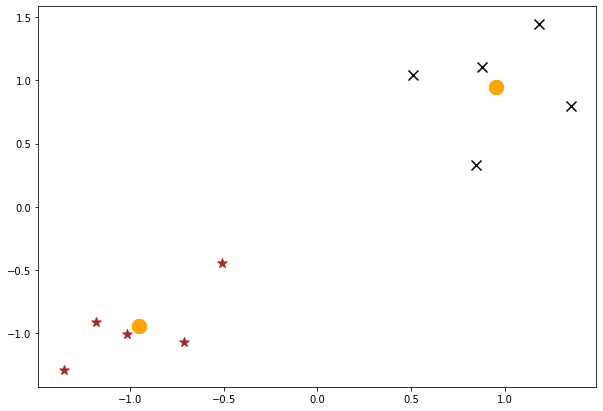

In [76]:
auto_kmeans_2(df,colors = ['black', 'brown'])

In [77]:
df_1 = pd.read_csv('clus2.csv', index_col=0)

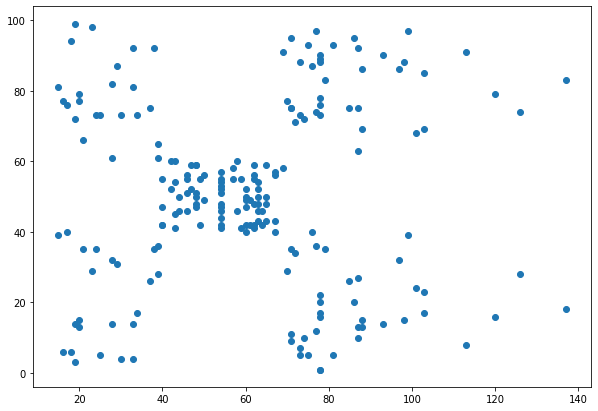

In [78]:
plt.figure(figsize =(10,7))
plt.scatter(df_1['sp3'], df_1['sp2'])

In [79]:
df_1 = pd.DataFrame(StandardScaler().fit_transform(df_1), columns=df_1.columns)

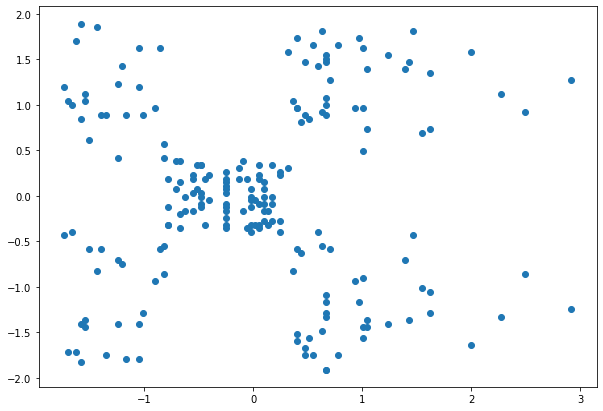

In [80]:
plt.figure(figsize =(10,7))
plt.scatter(df_1['sp3'], df_1['sp2'])

In [81]:
kmeans_1 = KMeans(n_clusters = 3, random_state=42)
kmeans_1.fit(df_1)

KMeans(n_clusters=3, random_state=42)

In [82]:
kmeans_1.inertia_

157.7040081503594

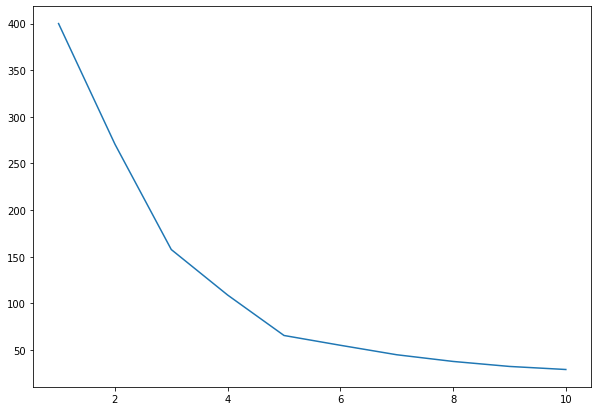

In [83]:
wcss  = []
for i in range (1,11):
  kmeans_1 = KMeans(n_clusters = i, random_state=42)
  kmeans_1.fit(df_1)
  wcss.append(kmeans_1.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)

In [84]:
kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
print(f'optimal number of clusters: {kl.elbow}')

optimal number of clusters: 5


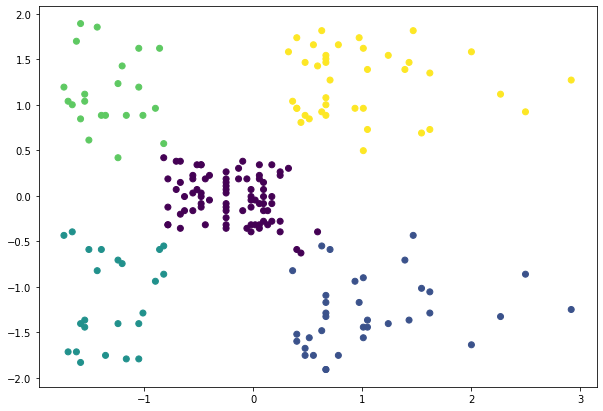

In [85]:
kmeans_1 = KMeans(n_clusters = 5, random_state=42)
kmeans_1.fit(df_1)
pred = kmeans_1.predict(df_1)
plt.figure(figsize =(10,7))
plt.scatter(df_1['sp3'], df_1['sp2'], c = pred)

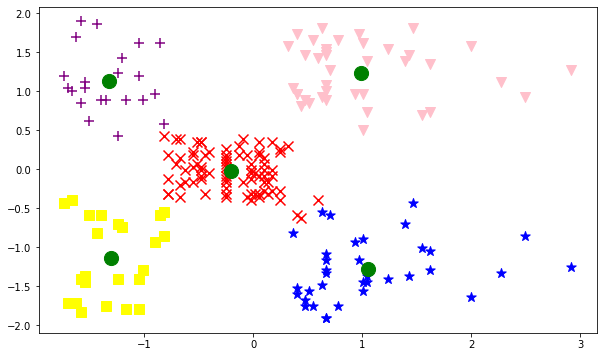

In [86]:
plt.figure(figsize = (10,6))
plt.scatter(df_1[pred==0][df_1.columns[0]], df_1[pred==0][df_1.columns[1]], s=100, c = 'red', marker = 'x')
plt.scatter(df_1[pred==1][df_1.columns[0]], df_1[pred==1][df_1.columns[1]], s=100, c = 'blue', marker = '*')
plt.scatter(df_1[pred==2][df_1.columns[0]], df_1[pred==2][df_1.columns[1]], s=100, c = 'yellow', marker = 's')
plt.scatter(df_1[pred==3][df_1.columns[0]], df_1[pred==3][df_1.columns[1]], s=100, c = 'purple', marker = '+')
plt.scatter(df_1[pred==4][df_1.columns[0]], df_1[pred==4][df_1.columns[1]], s=100, c = 'pink', marker = 'v')
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s = 200, c = 'green', marker = 'o')

In [87]:
def auto_kmeans_1(df_1):
  df_1 = pd.DataFrame(StandardScaler().fit_transform(df_1), columns = df_1.columns)
  wcss = []

  for i in range (1,11):
    kmeans_1 = KMeans(n_clusters = i, random_state=42)
    kmeans_1.fit(df_1)
    wcss.append(kmeans_1.inertia_)
  
  plt.figure(figsize=(10,7))
  plt.plot(range(1,11),wcss)
  plt.show()

  kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
  elbow_point = kl.elbow

  kmeans_1 = KMeans(n_clusters=elbow_point, random_state=42)
  kmeans_1.fit(df_1)
  pred = kmeans_1.predict(df_1)

  colors = ['red', 'blue','yellow', 'purple', 'pink']
  markers = ['x', '*', 's','+','v']

  print(f'Optimal number of clusters: {elbow_point}')

  plt.figure(figsize=(10,7))
  for i in range(elbow_point):
      plt.scatter(df_1[pred==i][df_1.columns[0]], df_1[pred==i][df_1.columns[1]], s=100, c = colors[i], marker = markers[i])
      plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s = 200, c = 'green', marker = 'v')

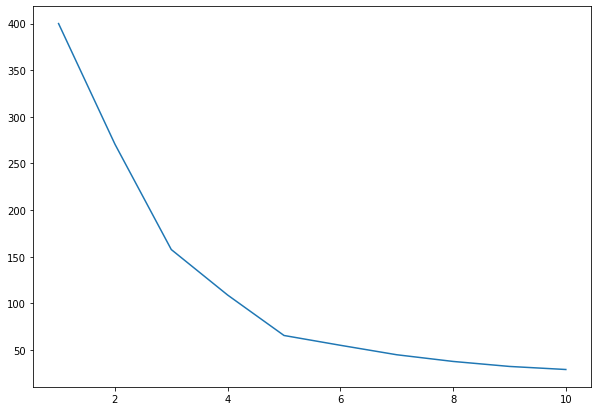

Optimal number of clusters: 5


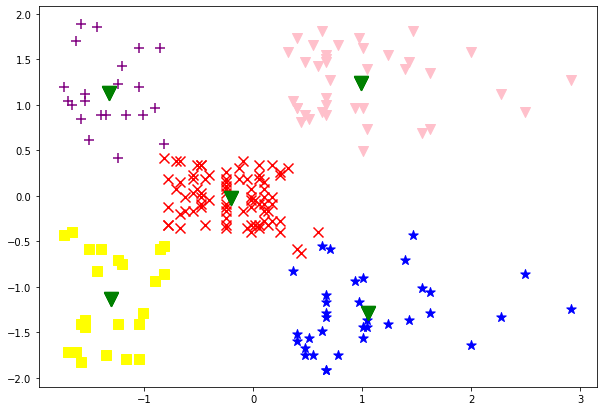

In [88]:
auto_kmeans_1(df_1)

In [89]:
def auto_kmeans_1_2(df_1, colors = ['red', 'blue', 'green','purple','pink'], markers = ['x', '*', '+','s','v']):
  df_1 = pd.DataFrame(StandardScaler().fit_transform(df_1), columns = df_1.columns)
  wcss = []

  for i in range (1,11):
    kmeans_1 = KMeans(n_clusters = i, random_state=42)
    kmeans_1.fit(df_1)
    wcss.append(kmeans_1.inertia_)
  
  plt.figure(figsize=(10,7))
  plt.plot(range(1,11),wcss)
  plt.show()

  kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
  elbow_point = kl.elbow

  kmeans_1 = KMeans(n_clusters=elbow_point, random_state=42)
  kmeans_1.fit(df_1)
  pred = kmeans_1.predict(df_1)

  colors = colors[:elbow_point]
  markers = markers[:elbow_point]

  print(f'Optimal number of clusters: {elbow_point}')

  plt.figure(figsize=(10,7))
  for i in range(elbow_point):
      plt.scatter(df_1[pred==i][df_1.columns[0]], df_1[pred==i][df_1.columns[1]], s=100, c = colors[i], marker = markers[i])
      plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s = 200, c = 'orange', marker = 'o')

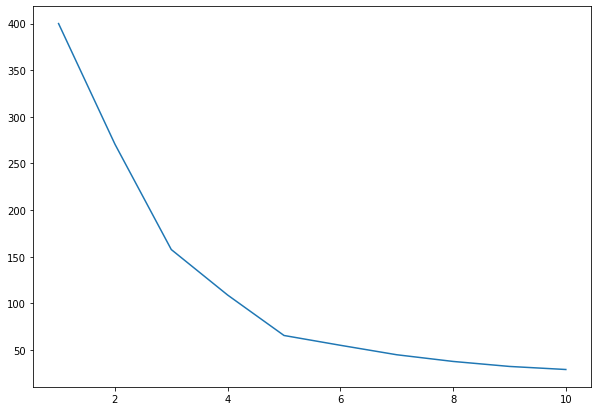

Optimal number of clusters: 5


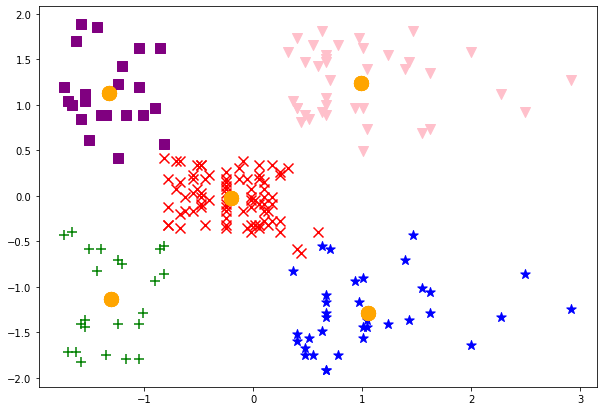

In [90]:
auto_kmeans_1_2(df_1,colors = ['red', 'blue','green', 'purple', 'pink'])

In [91]:
df_2 = pd.read_csv('clus3.csv', index_col=0)

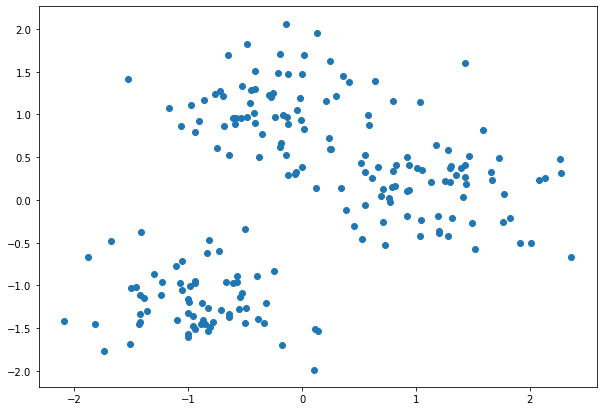

In [92]:
plt.figure(figsize=(10,7))
plt.scatter(df_2['desc1'], df_2['desc2'])

In [93]:
df_2 = pd.DataFrame(StandardScaler().fit_transform(df_2), columns=df_2.columns)

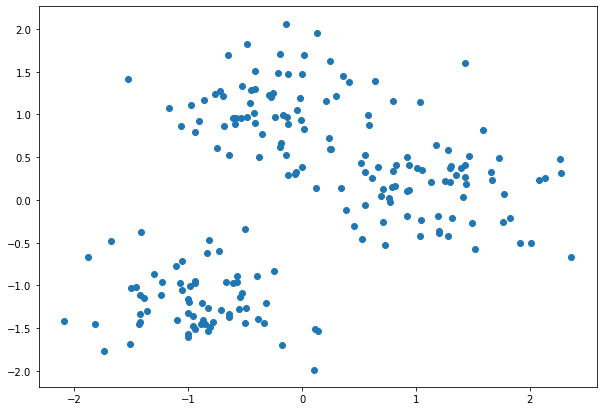

In [94]:
plt.figure(figsize=(10,7))
plt.scatter(df_2['desc1'], df_2['desc2'])

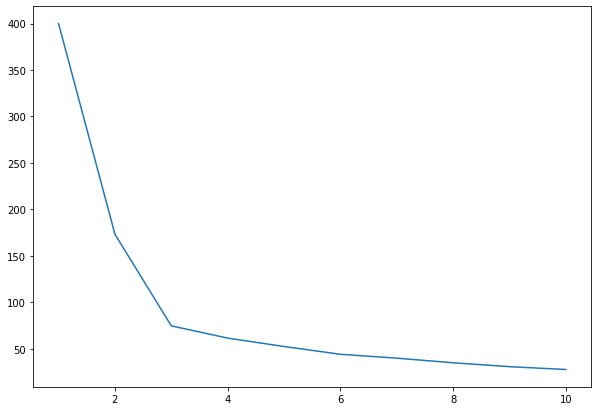

In [95]:
wcss = []
for i in range (1,11):
  kmeans_2 = KMeans(n_clusters = i, random_state=42)
  kmeans_2.fit(df_2)
  wcss.append(kmeans_2.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)

Optimal number of clusters: 3


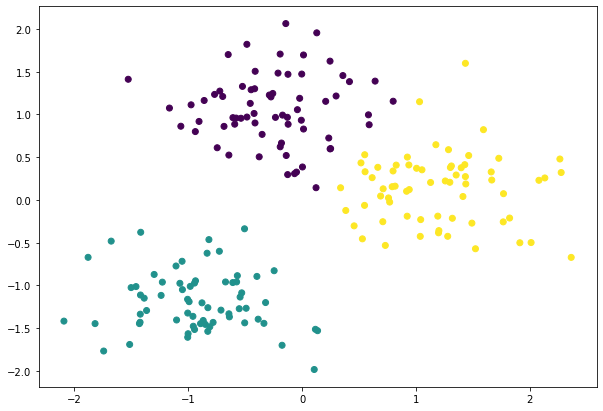

In [96]:
kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
print(f'Optimal number of clusters: {kl.elbow}')
kmeans_2 = KMeans(n_clusters = kl.elbow, random_state=42)
kmeans_2.fit(df_2)
pred = kmeans_2.predict(df_2)
plt.figure(figsize =(10,7))
plt.scatter(df_2['desc1'], df_2['desc2'], c = pred)

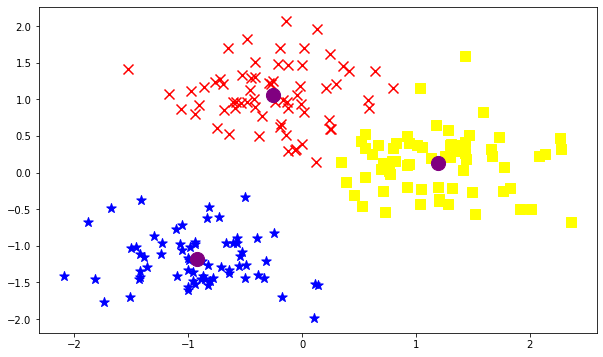

In [97]:
plt.figure(figsize = (10,6))
plt.scatter(df_2[pred==0][df_2.columns[0]], df_2[pred==0][df_2.columns[1]], s=100, c = 'red', marker = 'x')
plt.scatter(df_2[pred==1][df_2.columns[0]], df_2[pred==1][df_2.columns[1]], s=100, c = 'blue', marker = '*')
plt.scatter(df_2[pred==2][df_2.columns[0]], df_2[pred==2][df_2.columns[1]], s=100, c = 'yellow', marker = 's')
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s = 200, c = 'purple', marker = 'o')

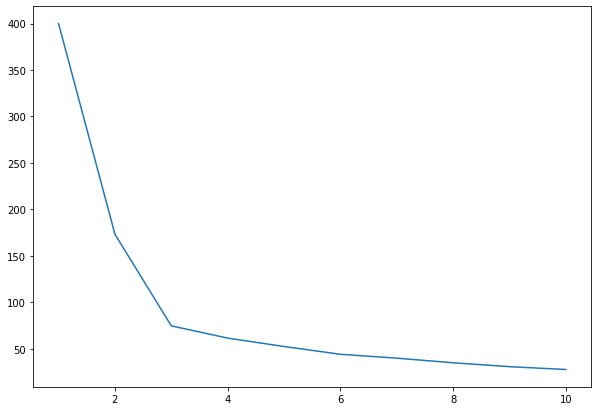

Optimal number of clusters: 3


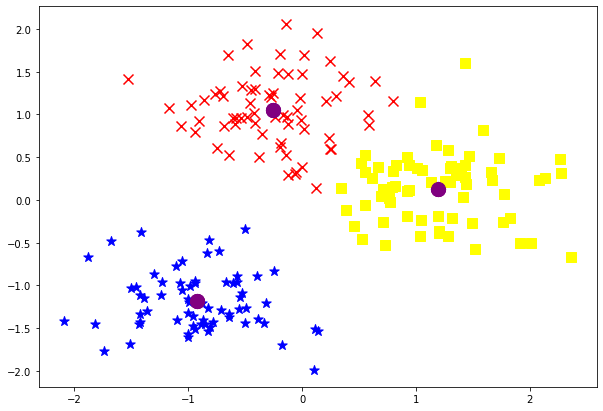

In [98]:
def auto_kmeans_2_1(df_2):
  df_2 = pd.DataFrame(StandardScaler().fit_transform(df_2), columns = df_2.columns)
  wcss = []

  for i in range (1,11):
    kmeans_2 = KMeans(n_clusters = i, random_state=42)
    kmeans_2.fit(df_2)
    wcss.append(kmeans_2.inertia_)
  
  plt.figure(figsize=(10,7))
  plt.plot(range(1,11),wcss)
  plt.show()

  kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
  elbow_point = kl.elbow

  kmeans_2 = KMeans(n_clusters=elbow_point, random_state=42)
  kmeans_2.fit(df_2)
  pred = kmeans_2.predict(df_2)

  colors = ['red', 'blue','yellow']
  markers = ['x', '*', 's']

  print(f'Optimal number of clusters: {elbow_point}')

  plt.figure(figsize=(10,7))
  for i in range(elbow_point):
      plt.scatter(df_2[pred==i][df_2.columns[0]], df_2[pred==i][df_2.columns[1]], s=100, c = colors[i], marker = markers[i])
      plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s = 200, c = 'purple', marker = 'o')

auto_kmeans_2_1(df_2)

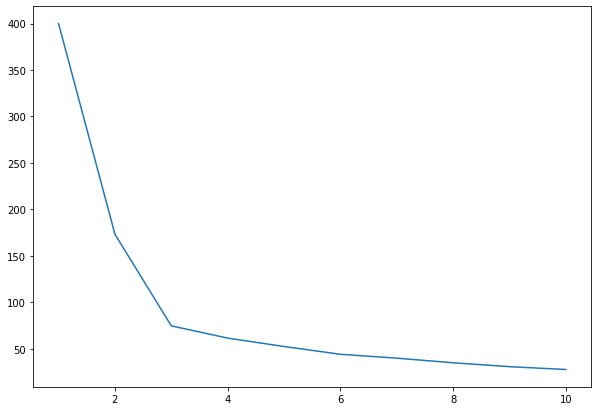

Optimal number of clusters: 3


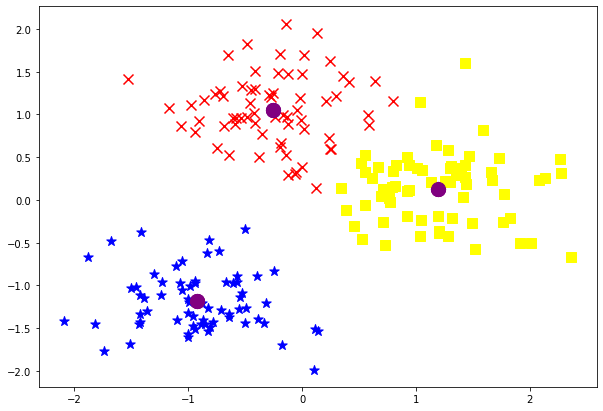

In [99]:
def auto_kmeans_2_2(df_2,colors = ['red', 'blue','yellow'],markers = ['x', '*', 's']):
  df_2 = pd.DataFrame(StandardScaler().fit_transform(df_2), columns = df_2.columns)
  wcss = []

  for i in range (1,11):
    kmeans_2 = KMeans(n_clusters = i, random_state=42)
    kmeans_2.fit(df_2)
    wcss.append(kmeans_2.inertia_)
  
  plt.figure(figsize=(10,7))
  plt.plot(range(1,11),wcss)
  plt.show()

  kl = KneeLocator(range(1,11), wcss, direction = 'decreasing', curve = 'convex')
  elbow_point = kl.elbow

  kmeans_2 = KMeans(n_clusters=elbow_point, random_state=42)
  kmeans_2.fit(df_2)
  pred = kmeans_2.predict(df_2)

  colors = colors[:elbow_point]
  markers = markers[:elbow_point]

  print(f'Optimal number of clusters: {elbow_point}')

  plt.figure(figsize=(10,7))
  for i in range(elbow_point):
      plt.scatter(df_2[pred==i][df_2.columns[0]], df_2[pred==i][df_2.columns[1]], s=100, c = colors[i], marker = markers[i])
      plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s = 200, c = 'purple', marker = 'o')

auto_kmeans_2_2(df_2,colors = ['red', 'blue','yellow'])